In [134]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#from cdo import *

In [48]:
#plt.rcParams['figure.figsize'] = [12, 8]
#plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slowe

In [161]:
f_gcn = "0.1863valMAE_87ep_GCN+READOUT_1990+1999+2003train_2005val_Z_7seed_19h58m_on_Aug_25_3n1if6lg_2012.nc"
f_cnn = "0.0694valMAE_99ep_CNN_1990+1999+2003train_2005val_Z_5024seed_12h27m_on_Aug_25_2xkr2c1v_2012.nc"
f_gn = "0.1903valMAE_98ep_GN+READOUT_1990+1999+2003train_2005val_Z_5024seed_13h13m_on_Aug_26_3j2qrh1h_2012.nc"
f_mlp = "0.1916valMAE_94ep_MLP_1990+1999+2003train_2005val_Z_99seed_02h18m_on_Aug_26_39473g78_2012.nc"

In [116]:
def make_plots(filename, only_errs: bool = True, snap=10):
    file = os.path.join("/home/mila/s/salva.ruhling-cachay/RT-DL/out/" ,filename)
    ds= xr.open_dataset(file)

    lat=ds.latitude.data
    lon=ds.longitude.data

    if only_errs:
        rows = 1
        fig_size = (14, 3)
        dpi = 100
    else:
        rows = 2
        fig_size = (14, 8)
        dpi = 100
    err_row = rows - 1
    fig, axs = plt.subplots(rows, 3, sharex='col', figsize=fig_size, dpi=dpi)
    if only_errs:
        axs = np.array([axs])

    if not only_errs:
        ds.rsdc_targets.sel(level=lev).mean(dim='snapshot').plot(ax=axs[0, 0])
        axs[0, 0].set_ylabel('True')

    diff = ds.rsdc_preds-ds.rsdc_targets
    diff.sel(level=lev).mean(dim='snapshot').plot(cmap='bwr', ax=axs[err_row, 0], yincrease=False)

    if only_errs:
        axs[0, 0].set_ylabel('Mean Bias Error')
    else:
        axs[1, 0].set_ylabel('Mean Bias Error')
    axs[0, 0].set_title('RSDC flux')

    press =ds.pressure.mean(dim=['longitude','latitude', 'snapshot']) / 100  # Pa to hPa
    ds = ds.assign_coords({'pressure': press})


    data_target = ds.rsdc_targets.mean(dim=['snapshot', 'longitude']).transpose()
    if not only_errs:
        data_target.plot(ax=axs[0, 1], y='pressure')

    diff = ds.rsdc_preds - ds.rsdc_targets
    mbe_diff = diff.mean(['snapshot', 'longitude']).transpose()
    mbe_diff.plot(ax=axs[err_row, 1], y='pressure')
    axs[0, 1].set_title('Zonal cross-section')
    #im = .pcolormesh(lat,press,np.transpose(data_diff),cmap='bwr',vmin=-3,vmax=3)

    data_target = ds.rsdc_targets.mean(dim=['snapshot', 'longitude']).transpose()
    if not only_errs:
        data_target.plot(ax=axs[0, 1], y='pressure')

    diff = ds.rsdc_preds - ds.rsdc_targets
    mbe_diff = diff.mean(['snapshot', 'longitude']).transpose()
    mbe_diff.plot(ax=axs[err_row, 1], y='pressure')
    axs[0, 1].set_title('Zonal cross-section')


    plt.show()

In [14]:
lev=49

# Year 2012
### Averaged over all 15 snapshots and longitude (right)

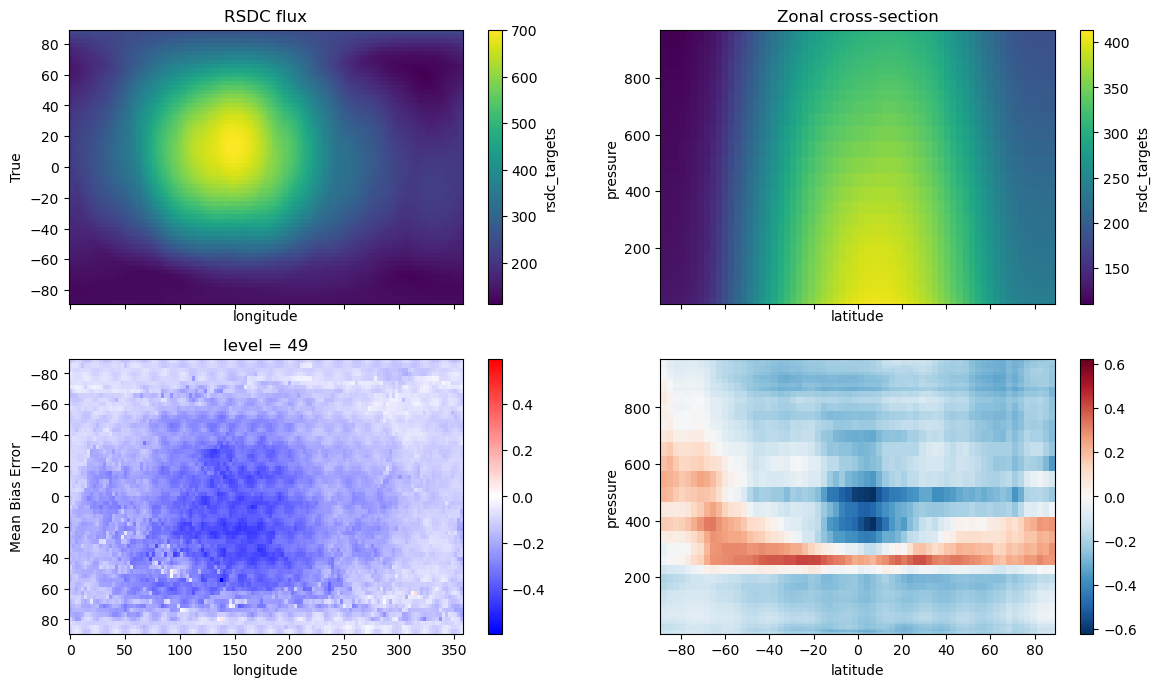

In [167]:
make_plots(f_cnn, only_errs=False)

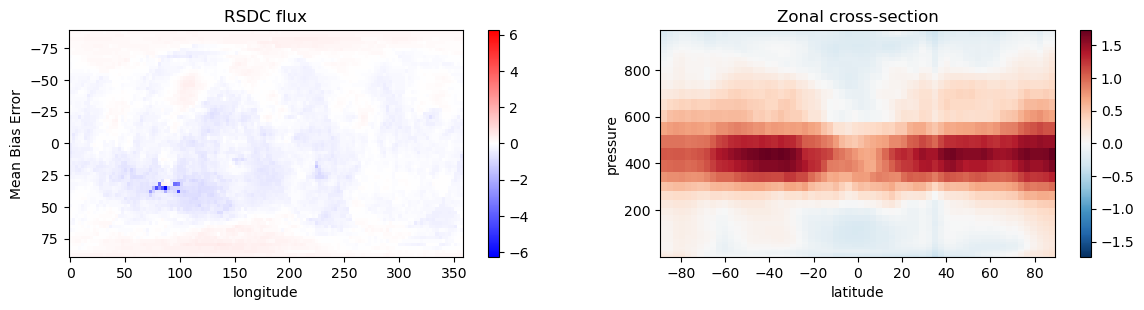

In [168]:
make_plots(f_mlp, only_errs=True)

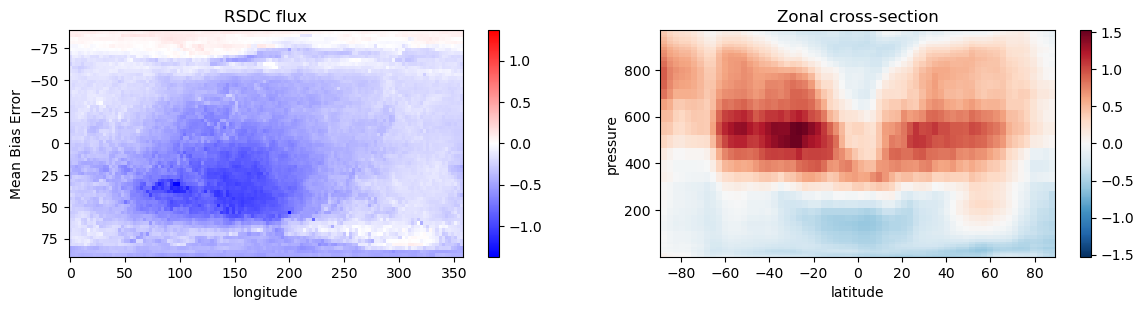

In [169]:
make_plots(f_gn, only_errs=True)

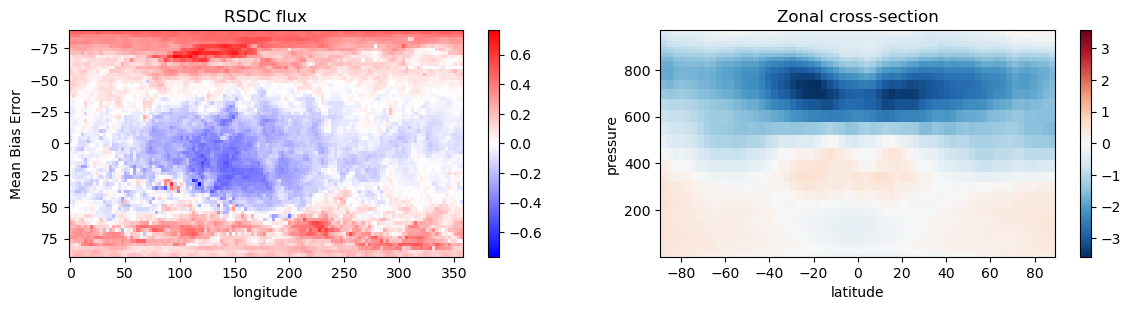

In [170]:
make_plots(f_gcn, only_errs=True)